<a href="https://colab.research.google.com/github/phu024/Calculating-the-areas-of-overlapping-regions/blob/main/Calculate_Overlapping_Areas_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [ ]:
!pip install geopandas shapely matplotlib

In [ ]:
!pip install gmplot

Define your API key

In [ ]:
google_api_key = 'ADD YOUR API KEY'

Import Libraries

In [ ]:
import gmplot
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

Define the coordinates for the polygons

In [ ]:
polygon1_coords = [(37.782, -122.447), (37.782, -122.445), (37.780, -122.445), (37.780, -122.447)]
polygon2_coords = [(37.781, -122.446), (37.781, -122.444), (37.779, -122.444), (37.779, -122.446)]

Create Shapely polygons

In [ ]:
# polygon1 = Polygon([(lon, lat) for lat, lon in polygon1_coords])
# polygon2 = Polygon([(lon, lat) for lat, lon in polygon2_coords])
polygon1 = Polygon(polygon1_coords)
polygon2 = Polygon(polygon2_coords)

Create GeoDataFrames

In [ ]:
gdf1 = gpd.GeoDataFrame({'geometry': [polygon1]})
gdf2 = gpd.GeoDataFrame({'geometry': [polygon2]})

Calculate the Overlap

In [ ]:
# Calculate the intersection
intersection = polygon1.intersection(polygon2)

# Calculate areas
area1 = polygon1.area
area2 = polygon2.area
overlap_area = intersection.area

# Calculate the percentage of overlap
overlap_percentage1 = (overlap_area / area1) * 100
overlap_percentage2 = (overlap_area / area2) * 100

print(f'Overlap Area: {overlap_area:.6f} square degrees')
print(f'Overlap Percentage (Polygon 1): {overlap_percentage1:.2f}%')
print(f'Overlap Percentage (Polygon 2): {overlap_percentage2:.2f}%')


Overlap Area: 0.000001 square degrees
Overlap Percentage (Polygon 1): 25.00%
Overlap Percentage (Polygon 2): 25.00%


Visualize the Polygons

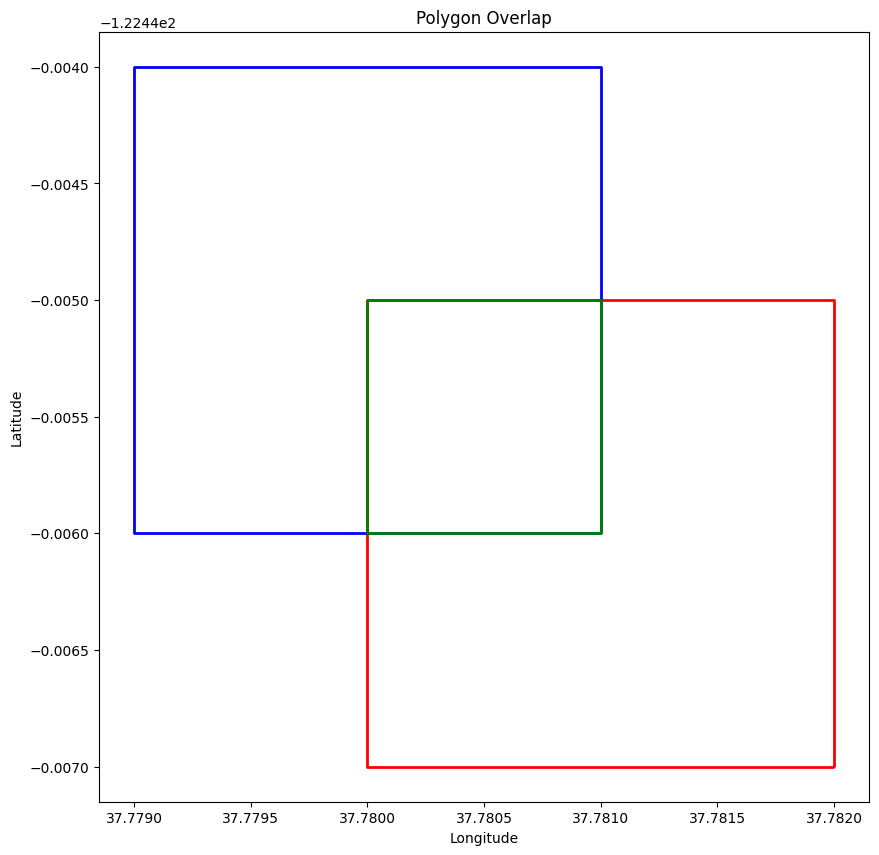

In [ ]:
# Plot the polygons and their intersection
fig, ax = plt.subplots(figsize=(10, 10))

gdf1.boundary.plot(ax=ax, color='red', linewidth=2)
gdf2.boundary.plot(ax=ax, color='blue', linewidth=2)

if not intersection.is_empty:
    gpd.GeoSeries([intersection]).boundary.plot(ax=ax, color='green', linewidth=2)

plt.title('Polygon Overlap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Display the Map in Colab

In [ ]:
# Create the map plotter
gmap = gmplot.GoogleMapPlotter(37.781, -122.445, 15, apikey=google_api_key)

# Extract latitude and longitude from polygon coordinates
polygon1_lats, polygon1_lons = zip(*polygon1_coords)
polygon2_lats, polygon2_lons = zip(*polygon2_coords)
if not intersection.is_empty:
    intersection_lats, intersection_lons = zip(*intersection.exterior.coords)

# Plot polygons
gmap.polygon(polygon1_lats, polygon1_lons, color='red', edge_width=2)
gmap.polygon(polygon2_lats, polygon2_lons, color='blue', edge_width=2)
if not intersection.is_empty:
    gmap.polygon(intersection_lats, intersection_lons, color='green', edge_width=2)

# Save the map to an HTML file
gmap.draw("polygon_overlap_map.html")
